# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Reading the data from dowloaded csv file

In [2]:
data=pd.read_csv("student_scores - student_scores.csv")

# Data Preprocessing Part

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Highly Correlated
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [5]:
data.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Drawing the regresson line 

In [7]:
from numpy.polynomial.polynomial import polyfit

Text(0, 0.5, 'Scores')

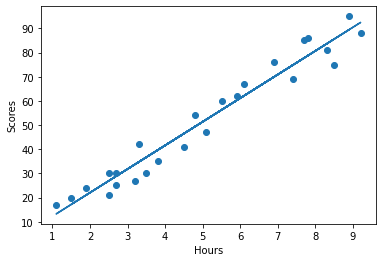

In [8]:
plt.scatter(data['Hours'],data['Scores'])
b, m = polyfit(data["Hours"], data["Scores"],1)
plt.plot(data["Hours"],b + m * data["Hours"], '-')
plt.xlabel("Hours")
plt.ylabel("Scores")


In [9]:
X=data["Hours"]
y=data["Scores"]

# Splitting the data into train and test set

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [11]:
print("Number of Entries in X_train",X_train.shape[0])
print("Number of Entries in X_test",X_test.shape[0])

Number of Entries in X_train 20
Number of Entries in X_test 5


# Importing the Model

In [12]:
from sklearn.linear_model import LinearRegression


In [13]:
model=LinearRegression(normalize=True)

In [14]:
X_train=np.array(X_train)

In [15]:
y_train=np.array(y_train)

In [16]:
X_train=[X_train]

In [17]:
X_train=np.transpose(X_train)

In [18]:
X_test=[np.array(X_test)]

In [19]:
X_test=np.transpose(X_test)

In [20]:
model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [21]:
y_predict=model.predict(X_test)

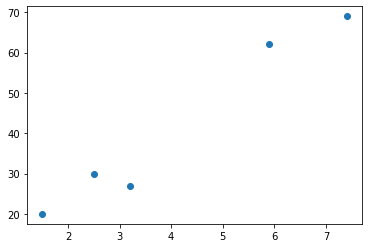

In [22]:
plt.scatter(X_test,y_test)


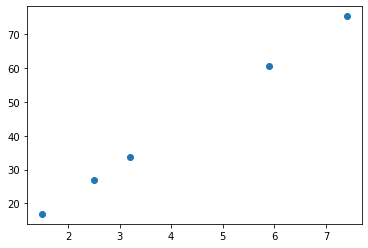

In [23]:
plt.scatter(X_test,y_predict)

In [24]:
from yellowbrick.regressor import PredictionError

/home/neelesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


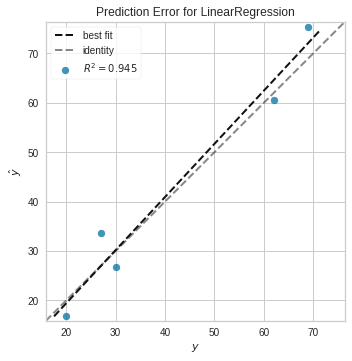

In [25]:
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# Comparing the results 

In [30]:
prediction=model.predict([[9.25]])

In [31]:
print("The Predicted Score for 9.25 Hours Study is:",prediction[0])

The Predicted Score for 9.25 Hours Study is: 93.69173248737538


In [27]:
from sklearn.metrics import mean_absolute_error
print("The Mean Absolute Error is ",mean_absolute_error(y_test,y_predict))

The Mean Absolute Error is  4.183859899002975


# Let's Make another Model By Normalizing The X Values

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)

In [33]:
X_train

array([[-0.57932795],
       [-1.34371899],
       [ 1.02991635],
       [ 0.66783639],
       [-1.66556785],
       [-0.05632355],
       [ 0.98968525],
       [-0.78048349],
       [ 1.23107189],
       [ 1.59315186],
       [ 0.34598753],
       [-0.70002127],
       [-1.02187013],
       [ 0.10460088],
       [-1.02187013],
       [ 1.31153411],
       [-1.10233235],
       [-0.17701687],
       [ 1.47245854],
       [-0.2977102 ]])

In [34]:
#Let's Normalize  X_test as Well
X_test=sc.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [36]:
y_predict2=model2.predict(X_test)

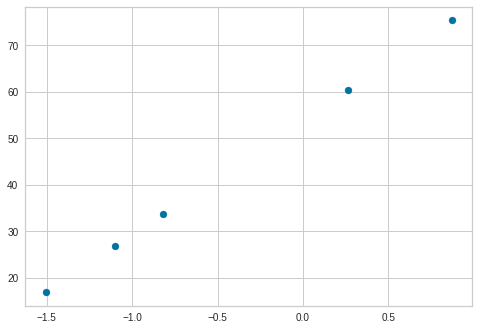

In [37]:
plt.scatter(X_test,y_predict2)

In [39]:
prediction=model2.predict(sc.transform([[9.25]]))

In [40]:
print("The Predicted Score for 9.25 Hours Study is:",prediction[0])

The Predicted Score for 9.25 Hours Study is: 93.69173248737536


In [41]:
#Let's Print The Mean Absolute Error
print("The mean Absolute Error is",mean_absolute_error(y_test,y_predict2))

The mean Absolute Error is 4.183859899002977


# Saving pkl File for web app Both Are Working Same So Saving Model


In [ ]:
pickle.dump(regressor, open('model.pkl','wb'))